# Exploratory Data Analysis & Intro

## Goal
1.  Investigate top-paying roles and skills in the data science industry.
2.  Use Python to explore a real-live dataset on job postings.
3.  For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:
* Create Jupyter Notebooks (showcasing core skills in Python).
* Create a summary page (via `README.md`) capturing your findings.
* Share this project with GitHub & LinkedIn.

# Questions to Answer
1.  What are the most demanded skills for the top 3 most popular data roles?
2.  How are in-demand skills trending for Data Analysts?
3.  How well do jobs and skills pay for Data Analysts?
4.  What is the most optimal skill to learn for Data Analysts? (High Demand & High Paying)

I'll be focusing on Egypt Data Analyst roles.



___
# 1.What are the most demanded skills for the top 3 most popular data roles?

## Methodology
1.  Clean-up skill column
2.  Calculate skill count based on `job_title_short`
3.  Plot initial findings
4.  Calculate skill percentage
5.  Plot final findings

## Original Exploration
- `13_Matplotlib_Format_Charts.ipynb`

___
# 2.How are in-demand skills trending for Data Analysts?

## Methodology
1.  Aggregate skill counts monthly
2.  Plot the monthly skill counts
3.  Re-analyze based on percentage of total jobs
4.  Plot the monthly skill demand

## Original Exploration
- `12_Exercise_Trending_Skills.ipynb`

___
# 3.How well do jobs and skills pay for Data Analysts?

## Methodology
1.  Evaluate median salary for all data jobs
2.  Find median salary per skill for Data Analysts
3.  Visualize for highest paying skills
4.  Visualize for highest demanded skills

## Original Exploration
* `18_Matplotlib_Box_Plots.ipynb`
* `19_Exercise_Skill_Pay_Analysis.ipynb`

___
# 4.What is the most optimal skill to learn for Data Analysts?

## Methodology
1.  Continue from last notebook to find percent of postings with skill
2.  Visualize median salary vs percent skill demand
3.  (Optional) Determine if certain technologies are more prevalent

## Original Exploration
* `15_Matplotlib_Scatter_Plots.ipynb`
* `16_Matplotlib_Advanced_Customization.ipynb`

___
## exploratory data analysis:
### Roles to explore:

In [1]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
# clean the data for Egyptian data analysts only
df_DA_Egy= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Egypt')]

C:\Users\go\AppData\Local\Temp\ipykernel_4296\1112708622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot,x='count',y='job_location',palette='mako')


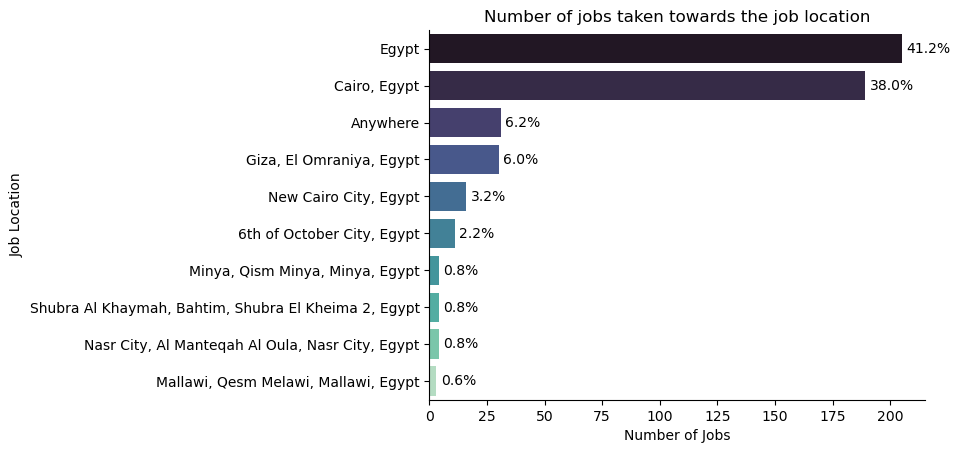

In [ ]:
df_plot = df_DA_Egy['job_location'].value_counts().to_frame().head(10)
# Calculate percentage
df_plot['percent'] = (df_plot['count'] / df_plot['count'].sum()) * 100

# Plot
ax = sns.barplot(data=df_plot,x='count',y='job_location',palette='mako')

# Annotate each bar with its percentage
for i, (value, percent) in enumerate(zip(df_plot['count'], df_plot['percent'])):
    ax.text(x= value + 2,y= i,s= f"{percent:.1f}%", va='center', ha='left', fontsize=10)

#zip() bundles elements from two (or more) iterables together, so you can loop through them in parallel.
#.text(x, y, s, ....search)

sns.despine() # to remove the right line of the graph
plt.xlabel("Number of Jobs")
plt.ylabel("Job Location")
plt.title("Number of jobs taken towards the job location")
plt.show()

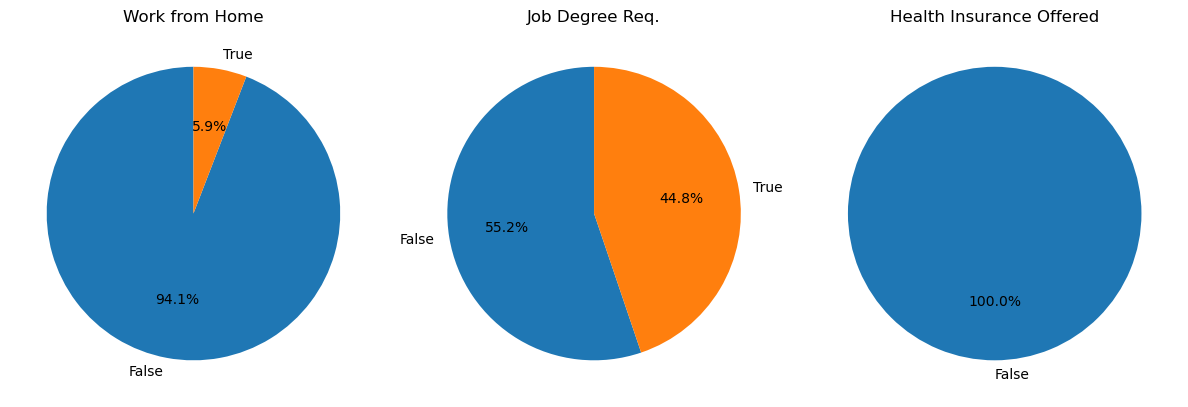

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_Egy[column].value_counts()
    labels = counts.index.astype(str)   # convert True/False (or 0/1) to string labels
    
    ax[i].pie(counts, startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


C:\Users\go\AppData\Local\Temp\ipykernel_4296\1214630507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot,x='count',y='company_name',palette='mako')


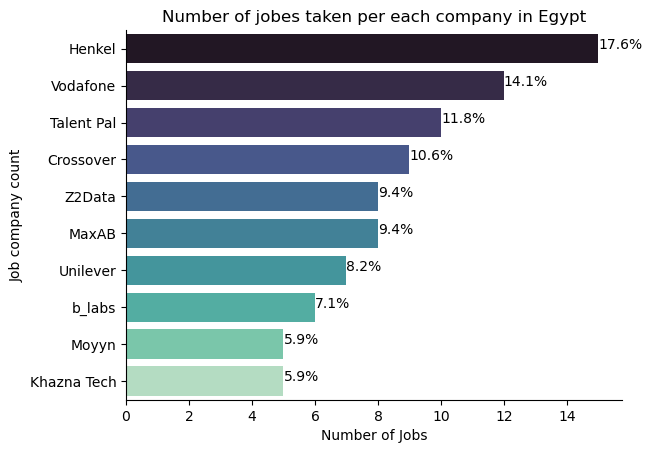

In [36]:
df_plot = df_DA_Egy['company_name'].value_counts().to_frame().head(10)
# Calculate percentage
df_plot['percent'] = (df_plot['count'] / df_plot['count'].sum()) * 100

# Plot
ax = sns.barplot(data=df_plot,x='count',y='company_name',palette='mako')

# Annotate each bar with its percentage
for i, (value, percent) in enumerate(zip(df_plot['count'], df_plot['percent'])):
    ax.text(value, i, f"{percent:.1f}%", fontsize=10)

sns.despine() # to remove 
plt.xlabel("Number of Jobs")
plt.ylabel("Job company count")
plt.title("Number of jobes taken per each company in Egypt")
plt.show()